#**Lab 9: Gale-Shapley and Irving Algorithms**

Javier Alejandro Ortiz Silva

***
**Notas**
* La implementacion del algorimo Gale-Shapley se tomo de TowardsDataScience.
* En esta entrega, por tiempo, finalmente no se utilizo el algotritmo de Irving.
* Para el peor caso se consulto bibliografia en internet. Estas referencias se incluyen mas adelante.
***

***
**Lab 9**

1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.


2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

***

***
**Contenido**
1. Implementacion de TowardsDataScience  https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2

2. Ajustes para la entrada de la funcion

3. Punto 1: desde la Celda 32 de codigo

4. Punto 2:  desde la Celda 47 de codigo
***

# **|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**

# **|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**

# **|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**

# **TowardsDataScience: Gale–Shapley algorithm simply explained**

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

Populating the interactive namespace from numpy and matplotlib


In [2]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

In [3]:
women_df = pd.DataFrame({'A': [3,4,2,1], 'B': [3,1,4,2], 'C':[2,3,4,1], 'D':[3,2,1,4]})
women_df.index = man_list

In [4]:
man_df = pd.DataFrame({'A': [1,1,2,4], 'B': [2,4,1,2], 'C':[3,3,3,3], 'D':[4,2,4,1]})
man_df.index = man_list

In [5]:
women_df

,A,B,C,D
a,3,3,2,3
b,4,1,3,2
c,2,4,4,1
d,1,2,1,4


In [6]:
man_df

,A,B,C,D
a,1,2,3,4
b,1,4,3,2
c,2,1,3,4
d,4,2,3,1


In [7]:
# dict to control which women each man can make proposals
women_available = {man:women_list for man in man_list}
# waiting list of men that were able to create pair on each iteration
waiting_list = []
# dict to store created pairs
proposals = {}
# variable to count number of iterations
count = 0

In [8]:
# while not all men have pairs
while len(waiting_list)<len(man_list):
    # man makes proposals
    for man in man_list:
        if man not in waiting_list:
            # each man make proposal to the top women from it's list
            women = women_available[man]
            best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
            proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                 women_df.loc[man][best_choice])
    # if women have more than one proposals 
    # she will choose the best option
    overlays = Counter([key[1] for key in proposals.keys()])
    # cycle to choose the best options
    for women in overlays.keys():
        if overlays[women]>1:
            # pairs to drop from proposals
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # if man was rejected by woman
            # there is no pint for him to make proposal 
            # second time to the same woman
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]]
                _women = copy(women_available[p_to_drop[0][0]])
                _women.remove(p_to_drop[0][1])
                women_available[p_to_drop[0][0]] = _women
    # man who successfully created pairs must be added to the waiting list 
    waiting_list = [man[0] for man in proposals.keys()]
    # update counter
    count+=1

In [9]:
proposals

{('a', 'C'): (3, 2),
 ('b', 'D'): (2, 2),
 ('c', 'A'): (2, 2),
 ('d', 'B'): (2, 2)}

In [10]:
count

6

# **|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**

# **|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**

# **|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**

# **Solucion del Lab**

***
#**Ajustes para la entrada de la funcion**
***

Importacion de librerias

In [11]:
%pylab inline
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#Metodo obtener labels de n hombres

In [12]:
def obtener_hombres(n):
  lista = []
  for i in range(1,n+1):
    s = 'H'
    Mi = s+ str(i)
    lista.append(Mi)
  return lista

Ejemplo:

In [13]:
obtener_hombres(5)

['H1', 'H2', 'H3', 'H4', 'H5']

#Metodo obtener labels de n mujeres

In [14]:
def obtener_mujeres(n):
  lista = []
  for i in range(1,n+1):
    s = 'M'
    Mi = s+ str(i)
    lista.append(Mi)
  return lista

Ejemplo:

In [15]:
obtener_mujeres(5)

['M1', 'M2', 'M3', 'M4', 'M5']

#Metodos crear diccionarios

* Funcion para obtener un diccionario que asocia el label de cada mujer con una lista que guarda la preferencia en que tiene a cada hombre. El indice (iniciando en 1) indica el hombre, y el valor la preferencia que tiene hacia el.

  Por ejemplo `'M5': [3, 1, 2, 4, 5]` significaria que a la mujer 5 le gusta especialmente el hombre 2, depues 3, 1,4 y por ultimo 5.

In [16]:
def diccionario_mujeres(n,listas):

  women_list = obtener_mujeres(n)

  d = {}
  
  for i in range(len(women_list)):
    d[women_list[i]] = listas[i]
  return d

Ejemplo:

In [17]:
d1 = [[1,2,3],[1,3,2],[1,2,3]]
diccionario_mujeres(3,d1)

{'M1': [1, 2, 3], 'M2': [1, 3, 2], 'M3': [1, 2, 3]}

* En el caso de los hombres el funcionamiento es similar y se tiene de entrada que cada hombre indica por cada mujer el interes que tiene en ella, sin embargo aqui el diccionario creado modela es el interes que en cada mujer tiene cada hombre. Esto es necesario para crear el dataframe por columnas.

In [18]:
def diccionario_hombres(n,listas):

  #Trasponer laa lista de preferencia, pues es necesario para el dataframe
  man_list = obtener_mujeres(n)

  listas = list(map(list, zip(*listas)))
  d = {}
  
  for i in range(len(man_list)):
    d[man_list[i]] = listas[i]
  return d

Ejemplo:

In [19]:
d2 = [[1,2,3],[3,2,1],[2,1,3]]
diccionario_hombres(3,d2)

{'M1': [1, 3, 2], 'M2': [2, 2, 1], 'M3': [3, 1, 3]}

#Metodos crear dataframes

* El dataframe que construye esta funcion representa en que preferencia tiene cada mujer a cada hombre

In [20]:
def dataframe_mujeres(n,listas):
  women_df = pd.DataFrame(diccionario_mujeres(n,listas))
  man_list = obtener_hombres(n)
  women_df.index = man_list
  return women_df

Ejemplo:

In [21]:
d1 = [[1,2,3],[1,3,2],[1,2,3]]
dataframe_mujeres(3,d1)

,M1,M2,M3
H1,1,1,1
H2,2,3,2
H3,3,2,3


* El dataframe que construye esta funcion representa en que preferencia tiene cada hombre a cada mujer

In [22]:
def dataframe_hombres(n,listas):
  man_df = pd.DataFrame(diccionario_hombres(n,listas))
  man_list = obtener_hombres(n)
  man_df.index = man_list
  return man_df

Ejemplo:

In [23]:
d1 = [[1,2,3],[3,2,1],[2,1,3]]
dataframe_hombres(3,d1)

,M1,M2,M3
H1,1,2,3
H2,3,2,1
H3,2,1,3


#Metodo Gale-Shapley (Notacion interes por cada persona)

Esta funcion surge de convertir en funcion el contenido del notebook TowardsDataScience, haciendo la gestion de tipos de dato, para que la entrada sean dos matrices y el valor n.


Esta funcion recibe por cada hombre
* [preferencia en que tiene a M1,preferencia en que tiene a M2, preferencia en que tiene a M3, ...]


Esta funcion recibe por cada mujer
* [preferencia en que tiene a H1,preferencia en que tiene a H2, preferencia en que tiene a H3, ...]

se retorna
* Emparejamiento estable y preferencia hacia la pareja de cada persona
* Numero de iteraciones realizadas

In [24]:
def Gale_Shapley(n, preferencias_mujeres, preferencias_hombres):

  man_list = obtener_hombres(n)
  women_list = obtener_mujeres(n)

  women_df = dataframe_mujeres(n,preferencias_mujeres)
  man_df = dataframe_hombres(n, preferencias_hombres)

  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0



  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1

  #print(proposals)
  #print(count)

  return proposals, count
    

Ejemplo:

In [25]:
pm = [[3,4,2,1],
      [3,1,4,2],
      [2,3,4,1],
      [3,2,1,4]]

ph = [[1,2,3,4],
      [1,4,3,2],
      [2,1,3,4],
      [4,2,3,1]]

p,c =Gale_Shapley(4,pm,ph)
print(c)
p

6


{('H1', 'M3'): (3, 2),
 ('H2', 'M4'): (2, 2),
 ('H3', 'M1'): (2, 2),
 ('H4', 'M2'): (2, 2)}

# Cambio de notacion de lista de preferencia a interes por persona

Funcion para que dada una lista de preferencia, donde cada numero representa una persona y estar mas a la izquierda representa un interes mayor, se obtenga una lista de interes por persona, donde cada indice empezando en 1 representa una persona y el valor guardado en ese indice representa el interes por esa persona.

In [26]:
def pasar_notacion(lista):
  l = len(lista)
  respuesta =[0]*l
  for i in range(l):
    respuesta[lista[i]-1]= i+1
  return respuesta

Ejemplo:

In [27]:
 pasar_notacion([1,3,4,2])

[1, 4, 2, 3]

Funcion que convierte la notacion en todas las filas de la matriz

In [28]:
def pasar_notaciones(listas):
  l = len(listas)
  for i in range(l):
    listas[i] = pasar_notacion(listas[i])
  return listas

Ejemplo:

In [29]:
pasar_notaciones([[1,3,4,2],[1,3,4,2],[1,3,4,2]])

[[1, 4, 2, 3], [1, 4, 2, 3], [1, 4, 2, 3]]

#Metodo Gale-Shapley (Notacion Listas de preferencia)

Esta funcion recibe la matriz o lista de listas de preferencia de las mujeres y de los hombres, donde en cada fila cada numero representa una persona y estar mas a la izquierda representa un mayor interes en esa persona.

Como retorno de la funcion estan:
* Emparejamiento estable y preferencia hacia la pareja de cada persona
* Numero de iteraciones realizadas

In [30]:
def Gale_Shapley_match_preference_lists(n, preferencias_mujeres, preferencias_hombres):

  pm = pasar_notaciones(preferencias_mujeres) 
  ph = pasar_notaciones(preferencias_hombres)
  #print(ph)
  #print(pm)
  p,c = Gale_Shapley(n, pm, ph)
  return p,c

Ejemplo:

In [31]:
pmuj = [[4,3,1,2],
        [2,4,1,3],
        [4,1,2,3],
        [3,2,1,4]]

phom = [[1,2,3,4],
        [1,4,3,2],
        [2,1,3,4],
        [4,2,3,1]]

parejas, cuenta = Gale_Shapley_match_preference_lists(4,pmuj,phom)
print("propuestas hechas: ", cuenta)
parejas

propuestas hechas:  6


{('H1', 'M3'): (3, 2),
 ('H2', 'M4'): (2, 2),
 ('H3', 'M1'): (2, 2),
 ('H4', 'M2'): (2, 2)}

***
# **Punto 1**
Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.
***

#**Peor caso**

***
Esta seccion se realizo teniendo como partida estas referencias:

* Estructura de un peor caso

  https://www.mdpi.com/1999-4893/6/2/371/htm#B2-algorithms-06-00371


* Formulas valores maximo de propuestas e iteraciones

  https://math.stackexchange.com/questions/1410898/worst-case-for-the-stable-marriage-problem

***

# **Valores teoricos peor caso**

Es posible demostrar que el mayor numero de propuestas realizadas durante el algoritmo Gale-Shapley es $n(n-1) + 1$ y que el mayor numero de iteraciones es $n^{2} - 2n + 2$,

El numero de iteraciones o dias en que al menos un hombre va a hacer una propuesta a una mujer es el indicador de nuestro interes.

In [32]:
def propuestas_peor_caso_teorico(n):
  return (n*(n-1)) +1

In [33]:
def dias_peor_caso_teorico(n):
  return n**2 - 2*n +2

Ejemplos:

In [34]:
propuestas_peor_caso_teorico(4)

13

In [35]:
dias_peor_caso_teorico(4)

10

#**Estructura peor caso**

Un peor caso para el algiritmo Gale-Shapley puede obteerse asi.


* **Listas de preferencia de los Hombres**

  Matriz con diagonales ascendentes (/) donde cada fila es un dezplazamiento circular a la izquierda  de la fila anterior ignorando el ultimo elemento, y la ultima columna esta llena de valores n. La primera fila consiste en los valores de 1 a n.

*  **Listas de preferencia de las Mujeres**

  Matriz con diagonales ascendentes (/) donde cada fila es un dezplazamiento circular a la izquierda  de la fila anterior. La primera fila consiste en los valores de 2 a n y despues un 1.

Ejemplo:

Para n = 4 un peor caso puede ser el siguiente

In [36]:
phom = [[1,2,3,4],
        [2,3,1,4],
        [3,1,2,4],
        [1,2,3,4]]

pmuj = [[2,3,4,1],
        [3,4,1,2],
        [4,1,2,3],
        [1,2,3,4]]


parejas, cuenta = Gale_Shapley_match_preference_lists(4,pmuj,phom)
print("Valor maximas iteraciones teorico: ",dias_peor_caso_teorico(4))
print("Propuestas hechas experimento: ", cuenta)
print("\nEmparejamiento estable")
parejas

Valor maximas iteraciones teorico:  10
Propuestas hechas experimento:  10

Emparejamiento estable


{('H1', 'M4'): (4, 1),
 ('H2', 'M1'): (3, 1),
 ('H3', 'M2'): (3, 1),
 ('H4', 'M3'): (3, 1)}

# Funcion para obtener las listas de preferencia de los hombres en un peor caso 

In [37]:
def obtener_lista_1_a_n(n):
  return list(range(1,n+1))

In [38]:
def obtener_lista_i_a_n(i,n):
  return list(range(i,n+1))

In [39]:
def peor_caso_hombres(n):
  
  #matriz = [[[0]*n]*n]
  matriz =[]

  #Construir n filas
  for i in range(1,n+1):
    corte1 = obtener_lista_i_a_n(i,n-1)
    #print(corte1)
    corte2 = obtener_lista_1_a_n(i-1)+ [n]
    #print(corte2)
    fila = corte1 + corte2
    matriz.append(fila)

  #matriz[1] = matriz[0][0:3]+[n]
  return matriz

Ejemplo:

In [40]:
pc5 = peor_caso_hombres(5)
for fila in pc5:
    print(*fila)

1 2 3 4 5
2 3 4 1 5
3 4 1 2 5
4 1 2 3 5
1 2 3 4 5


# Funcion para obtener las listas de preferencia de las mujeres en un peor caso 

In [41]:
def peor_caso_mujeres(n):
  
  #matriz = [[[0]*n]*n]
  matriz =[]

  #Construir n filas
  for i in range(1,n+1):
    corte1 = obtener_lista_i_a_n(i+1,n)
    #print(corte1)
    corte2 = obtener_lista_1_a_n(i)
    #print(corte2)
    fila = corte1 + corte2
    matriz.append(fila)

  #matriz[1] = matriz[0][0:3]+[n]
  
  return matriz

Ejemplo:

In [42]:
ph1 = peor_caso_mujeres(5)
for fila in ph1:
    print(*fila)

2 3 4 5 1
3 4 5 1 2
4 5 1 2 3
5 1 2 3 4
1 2 3 4 5


# **Funcion para correr el algoritmo Gale-Shapley para n usando un peor caso**

Esta funcion genera las listas de preferencia para hombres y mujeres correspondientes a un peor caso donde hay n hombres y n mujeres. Con estas listas de preferencia se ejecuta el algoritmo y se obtienen los emparejamientos y las iteraciones.

In [43]:
def matching_peor_caso_Gale_Shapley(n):

  MP_M = peor_caso_mujeres(n)
  MP_H = peor_caso_hombres(n)  


  """
  for fila in MP_M:
    print(*fila)
  print()

  for fila in MP_H:
    print(*fila)
  print()
  """

  parejas, cuenta = Gale_Shapley_match_preference_lists(n, MP_M, MP_H)
  return parejas, cuenta

#**Verificacion experimental**

Probamos los valores de la anterior funcion con respecto a los valores teoricos. Vemos que los resultados son correctos.

In [44]:
for i in range (1,10+1):
  matches, days = matching_peor_caso_Gale_Shapley(i)

  print("n = ", i)
  print("dias-iteraciones experimento: ",days)
  print("dias-iteraciones teorico:",dias_peor_caso_teorico(i),"\n")

n =  1
dias-iteraciones experimento:  1
dias-iteraciones teorico: 1 

n =  2
dias-iteraciones experimento:  2
dias-iteraciones teorico: 2 

n =  3
dias-iteraciones experimento:  5
dias-iteraciones teorico: 5 

n =  4
dias-iteraciones experimento:  10
dias-iteraciones teorico: 10 

n =  5
dias-iteraciones experimento:  17
dias-iteraciones teorico: 17 

n =  6
dias-iteraciones experimento:  26
dias-iteraciones teorico: 26 

n =  7
dias-iteraciones experimento:  37
dias-iteraciones teorico: 37 

n =  8
dias-iteraciones experimento:  50
dias-iteraciones teorico: 50 

n =  9
dias-iteraciones experimento:  65
dias-iteraciones teorico: 65 

n =  10
dias-iteraciones experimento:  82
dias-iteraciones teorico: 82 



#**Maximo numero de iteraciones para n = 4 y 40**

#**n = 4**

In [45]:
print("n = 4\n\n")
print("dias-iteraciones teorico:",dias_peor_caso_teorico(4),"\n")

matches, days = matching_peor_caso_Gale_Shapley(4)
print("dias-iteraciones experimento: ",days)

print("\n\n\n\nListas de preferencia de los hombres\n")
ch = 1

MPM = peor_caso_mujeres(4)
MPH = peor_caso_hombres(4)

for fila in MPH:
    label = 'H'+str(ch)+':   '
    print(label,*fila)
    ch = ch +1

print("\n\nListas de preferencia de las mujeres\n")
cm = 1
for fila in MPM:
    label = 'M'+str(cm)+':   '
    print(label,*fila)
    cm = cm +1

print("\n\n\n\n\nEmparejamiento estable y preferencia lograda de cada persona a su pareja\n")
matches

n = 4


dias-iteraciones teorico: 10 

dias-iteraciones experimento:  10




Listas de preferencia de los hombres

H1:    1 2 3 4
H2:    2 3 1 4
H3:    3 1 2 4
H4:    1 2 3 4


Listas de preferencia de las mujeres

M1:    2 3 4 1
M2:    3 4 1 2
M3:    4 1 2 3
M4:    1 2 3 4





Emparejamiento estable y preferencia lograda de cada persona a su pareja



{('H1', 'M4'): (4, 1),
 ('H2', 'M1'): (3, 1),
 ('H3', 'M2'): (3, 1),
 ('H4', 'M3'): (3, 1)}

#**n = 40**

In [46]:
print("n = 40\n\n")
print("dias-iteraciones teorico:",dias_peor_caso_teorico(40),"\n")

matches, days = matching_peor_caso_Gale_Shapley(40)
print("dias-iteraciones experimento: ",days)

print("\n\n\n\nListas de preferencia de los hombres\n")
ch = 1

MPM = peor_caso_mujeres(40)
MPH = peor_caso_hombres(40)

for fila in MPH:
    label = 'H'+str(ch)+':   '
    print(label,*fila)
    ch = ch +1

print("\n\nListas de preferencia de las mujeres\n")
cm = 1
for fila in MPM:
    label = 'M'+str(cm)+':   '
    print(label,*fila)
    cm = cm +1

print("\n\n\n\n\nEmparejamiento estable y preferencia lograda de cada persona a su pareja\n")
matches

n = 40


dias-iteraciones teorico: 1522 

dias-iteraciones experimento:  1522




Listas de preferencia de los hombres

H1:    1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
H2:    2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 40
H3:    3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 40
H4:    4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 3 40
H5:    5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 3 4 40
H6:    6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 3 4 5 40
H7:    7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 1 2 3 4 5 6 40
H8:    8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 2

{('H1', 'M40'): (40, 1),
 ('H10', 'M9'): (39, 1),
 ('H11', 'M10'): (39, 1),
 ('H12', 'M11'): (39, 1),
 ('H13', 'M12'): (39, 1),
 ('H14', 'M13'): (39, 1),
 ('H15', 'M14'): (39, 1),
 ('H16', 'M15'): (39, 1),
 ('H17', 'M16'): (39, 1),
 ('H18', 'M17'): (39, 1),
 ('H19', 'M18'): (39, 1),
 ('H2', 'M1'): (39, 1),
 ('H20', 'M19'): (39, 1),
 ('H21', 'M20'): (39, 1),
 ('H22', 'M21'): (39, 1),
 ('H23', 'M22'): (39, 1),
 ('H24', 'M23'): (39, 1),
 ('H25', 'M24'): (39, 1),
 ('H26', 'M25'): (39, 1),
 ('H27', 'M26'): (39, 1),
 ('H28', 'M27'): (39, 1),
 ('H29', 'M28'): (39, 1),
 ('H3', 'M2'): (39, 1),
 ('H30', 'M29'): (39, 1),
 ('H31', 'M30'): (39, 1),
 ('H32', 'M31'): (39, 1),
 ('H33', 'M32'): (39, 1),
 ('H34', 'M33'): (39, 1),
 ('H35', 'M34'): (39, 1),
 ('H36', 'M35'): (39, 1),
 ('H37', 'M36'): (39, 1),
 ('H38', 'M37'): (39, 1),
 ('H39', 'M38'): (39, 1),
 ('H4', 'M3'): (39, 1),
 ('H40', 'M39'): (39, 1),
 ('H5', 'M4'): (39, 1),
 ('H6', 'M5'): (39, 1),
 ('H7', 'M6'): (39, 1),
 ('H8', 'M7'): (39, 1),
 (

***
#**Punto 2**
Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.
***

#**Experimentos con listas de preferencias aleatorias**

**Funcion para obtener una lista de preferencia aleatoria**

In [47]:
import numpy as np

def preferencia_random(lista_n_personas):
  return list(np.random.permutation(lista_n_personas))

Ejemplos:

In [48]:
print(preferencia_random([1, 2, 3]))

[3, 2, 1]


In [49]:
print(preferencia_random([1, 2, 3]))

[3, 2, 1]


# **Funcion para obtener listas de preferencias aleatorias**

In [50]:
def caso_a_simular(n):
  #pf = posibles_preferencias(n)
  numeros_1_n = obtener_lista_1_a_n(n)

  Matriz_preferencias_mujeres = []
  Matriz_preferencias_hombres = []

  #Para cada mujer generar una lista de preferencia aleatoria, segun alguna permutacion
  for i in range(n):
    Matriz_preferencias_mujeres.append(preferencia_random(numeros_1_n))


  #Para cada hombre generar una lista de preferencia aleatoria, segun alguna permutacion
  for i in range(n):
    Matriz_preferencias_hombres.append(preferencia_random(numeros_1_n))
  

  return Matriz_preferencias_mujeres, Matriz_preferencias_hombres



Ejemplos:

In [51]:
matM, matH = caso_a_simular(2)
print(matM)
print(matH)

[[1, 2], [1, 2]]
[[1, 2], [2, 1]]


In [52]:
matM, matH = caso_a_simular(2)
print(matM)
print(matH)

[[1, 2], [1, 2]]
[[1, 2], [2, 1]]


# **Funcion para ejecutar la solucion de n emparejamientos aleatorios de tamaño n**

Esta funcion recibe el numero de problemas a resolver y el valor n correspondiente al numero de hombres que es igual al numero de mujeres para los problemas a generar. La funcion en cada iteracion se ocupa de crear listas de preferencia aleatorias y correr el algoritmo Gale-Shapley para hacer el emparejamiento y obtener las iteraciones hechas para ese problema. Mientras se da la ejecucion se llevan 3 medidas de interes que son las iteraciones maximas, minimas y el promedio, y asi mismo en una lista de tamano n+1 se lleva la frecuencia del numero de iteraciones del algoritmo. Cuando finalizan las simulaciones se imprime  el histograma de frecuencias de las iteraciones y los resultados finales de las medidas de interes.

In [53]:
def simular_n_matchings(numSimulaciones,n):
  teorico = dias_peor_caso_teorico(n)
  ocurrencia = [0]*(teorico + 1)
  
  acumulador = 0
  minimo = teorico +10_000
  maximo = 0

  for i in range(numSimulaciones):

    #Obtener listas de preferencia aleatorias para todas las personas
    MP_Msim, MP_Hsim = caso_a_simular(n)
    #print(MP_Msim)
    #print(MP_Hsim)

    #Correr el algoritmo Gale_Shapley usando las preferencias generadas aleatoriamente
    parejas, cuenta = Gale_Shapley_match_preference_lists(n, MP_Msim, MP_Hsim)

    #Actualizar contadores
    ocurrencia[cuenta] +=1
    acumulador = acumulador + cuenta
    minimo = min(cuenta, minimo)
    maximo = max(cuenta,maximo)

  promedio = acumulador/numSimulaciones


  #Graficacion de histograma
  plt.bar(range(0,teorico+1),  ocurrencia)
  plt.title('Distribucion iteraciones para emparejar n hombres con n mujeres\n')
  plt.xlabel('Dias o iteraciones')
  plt.ylabel('Frecuencia')
  plt.show()

  #Impresion de resultados del experimento
  print("____________________________________________________\n")
  print("n = ",n)
  print("Valor teorico iteraciones maximas = ",teorico)
  print("\n\nRESULTADOS EXPERIMENTO")
  print("   Minimo   =  ", minimo)
  print("   Maximo   =  ", maximo)
  print("   Promedio =  ", promedio)
  print("____________________________________________________")
  #return minimo, maximo, promedio

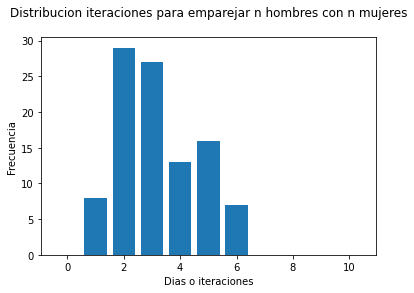

____________________________________________________

n =  4
Valor teorico iteraciones maximas =  10


RESULTADOS EXPERIMENTO
   Minimo   =   1
   Maximo   =   6
   Promedio =   3.21
____________________________________________________


In [54]:
simular_n_matchings(100,4)

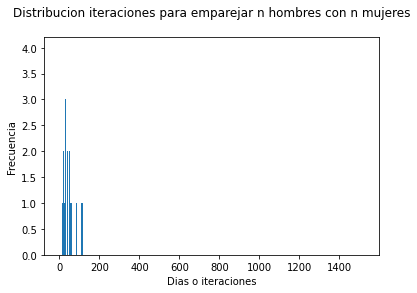

____________________________________________________

n =  40
Valor teorico iteraciones maximas =  1522


RESULTADOS EXPERIMENTO
   Minimo   =   12
   Maximo   =   177
   Promedio =   57.59
____________________________________________________


In [55]:
simular_n_matchings(100,40)